# 🤖 Day 3: Model Training - Linear Regression vs. Gradient Boosting

## 📌 Objective:
- Load cleaned dataset
- Prepare features (encoding categorical variables)
- Train Linear Regression and Gradient Boosting models
- Compare performance using RMSE and R²


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [2]:
df = pd.read_csv("../data/cleaned_transformed.csv")
df.shape
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice,LogGrLivArea
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,12.247699,7.444833
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,12.109016,7.141245
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,12.317171,7.488294
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849405,7.448916
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,12.429220,7.695758


## 🔧 Feature Preparation

- Encode categorical variables using one-hot encoding
- Drop columns that won't be used
- Use `LogSalePrice` as the target variable


In [8]:

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Features and target
X = df_encoded.drop(columns=["LogSalePrice"])
y = df_encoded["LogSalePrice"]

# Fill missing values
X = X.fillna(X.median(numeric_only=True))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 📉 Linear Regression Model


In [9]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_lr = linreg.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:.4f}")
print(f"Linear Regression R²: {r2_lr:.4f}")


Linear Regression RMSE: 0.1319
Linear Regression R²: 0.8968


## 🌲 Gradient Boosting Regressor


In [10]:
gbr = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting RMSE: {rmse_gbr:.4f}")
print(f"Gradient Boosting R²: {r2_gbr:.4f}")


Gradient Boosting RMSE: 0.1245
Gradient Boosting R²: 0.9081


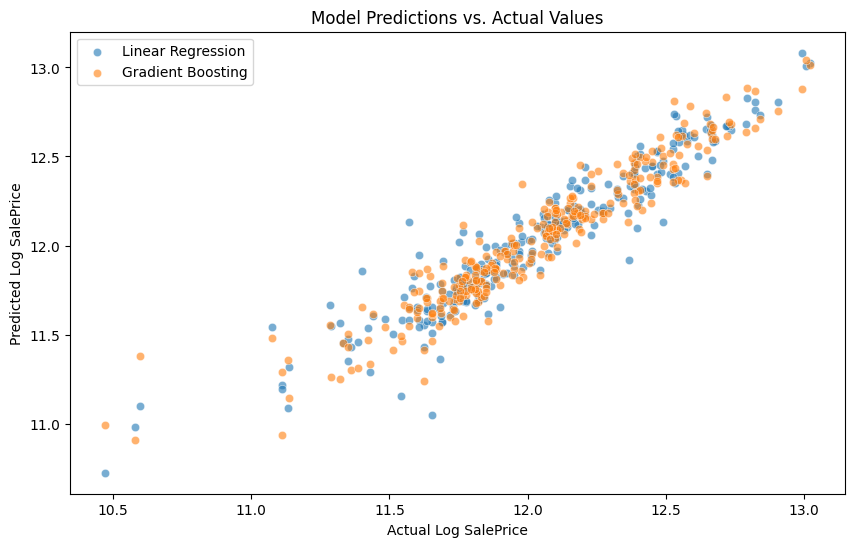

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, label="Linear Regression", alpha=0.6)
sns.scatterplot(x=y_test, y=y_pred_gbr, label="Gradient Boosting", alpha=0.6)
plt.xlabel("Actual Log SalePrice")
plt.ylabel("Predicted Log SalePrice")
plt.title("Model Predictions vs. Actual Values")
plt.legend()
plt.show()


In [12]:
joblib.dump(linreg, "../models/linear_regression.pkl")
joblib.dump(gbr, "../models/gradient_boosting.pkl")


['../models/gradient_boosting.pkl']

## ✅ Summary

- Trained both Linear Regression and Gradient Boosting models
- Evaluated using RMSE and R²
- Gradient Boosting outperformed Linear Regression
- Models saved for future use
